In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.exceptions import ConvergenceWarning #GEREKSİZ WARNİNGLERDEN KURTULMAK İÇİN
import warnings
from sklearn.metrics import mean_squared_error


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning) #İşlemler sırasında çıkan uyarılardan kurtulmak için

In [ ]:
df = pd.read_csv('sample_data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Verilen target değişkene göre sayısal olarak verileri analiz eden method
def num_target_analyse(dataframe,target, col_name):
    print(dataframe.groupby(col_name).agg({target : 'mean'}))
def cat_target_analyse(dataframe, target, col_name):
    print(dataframe.groupby(col_name).agg({target : 'value_counts'}))

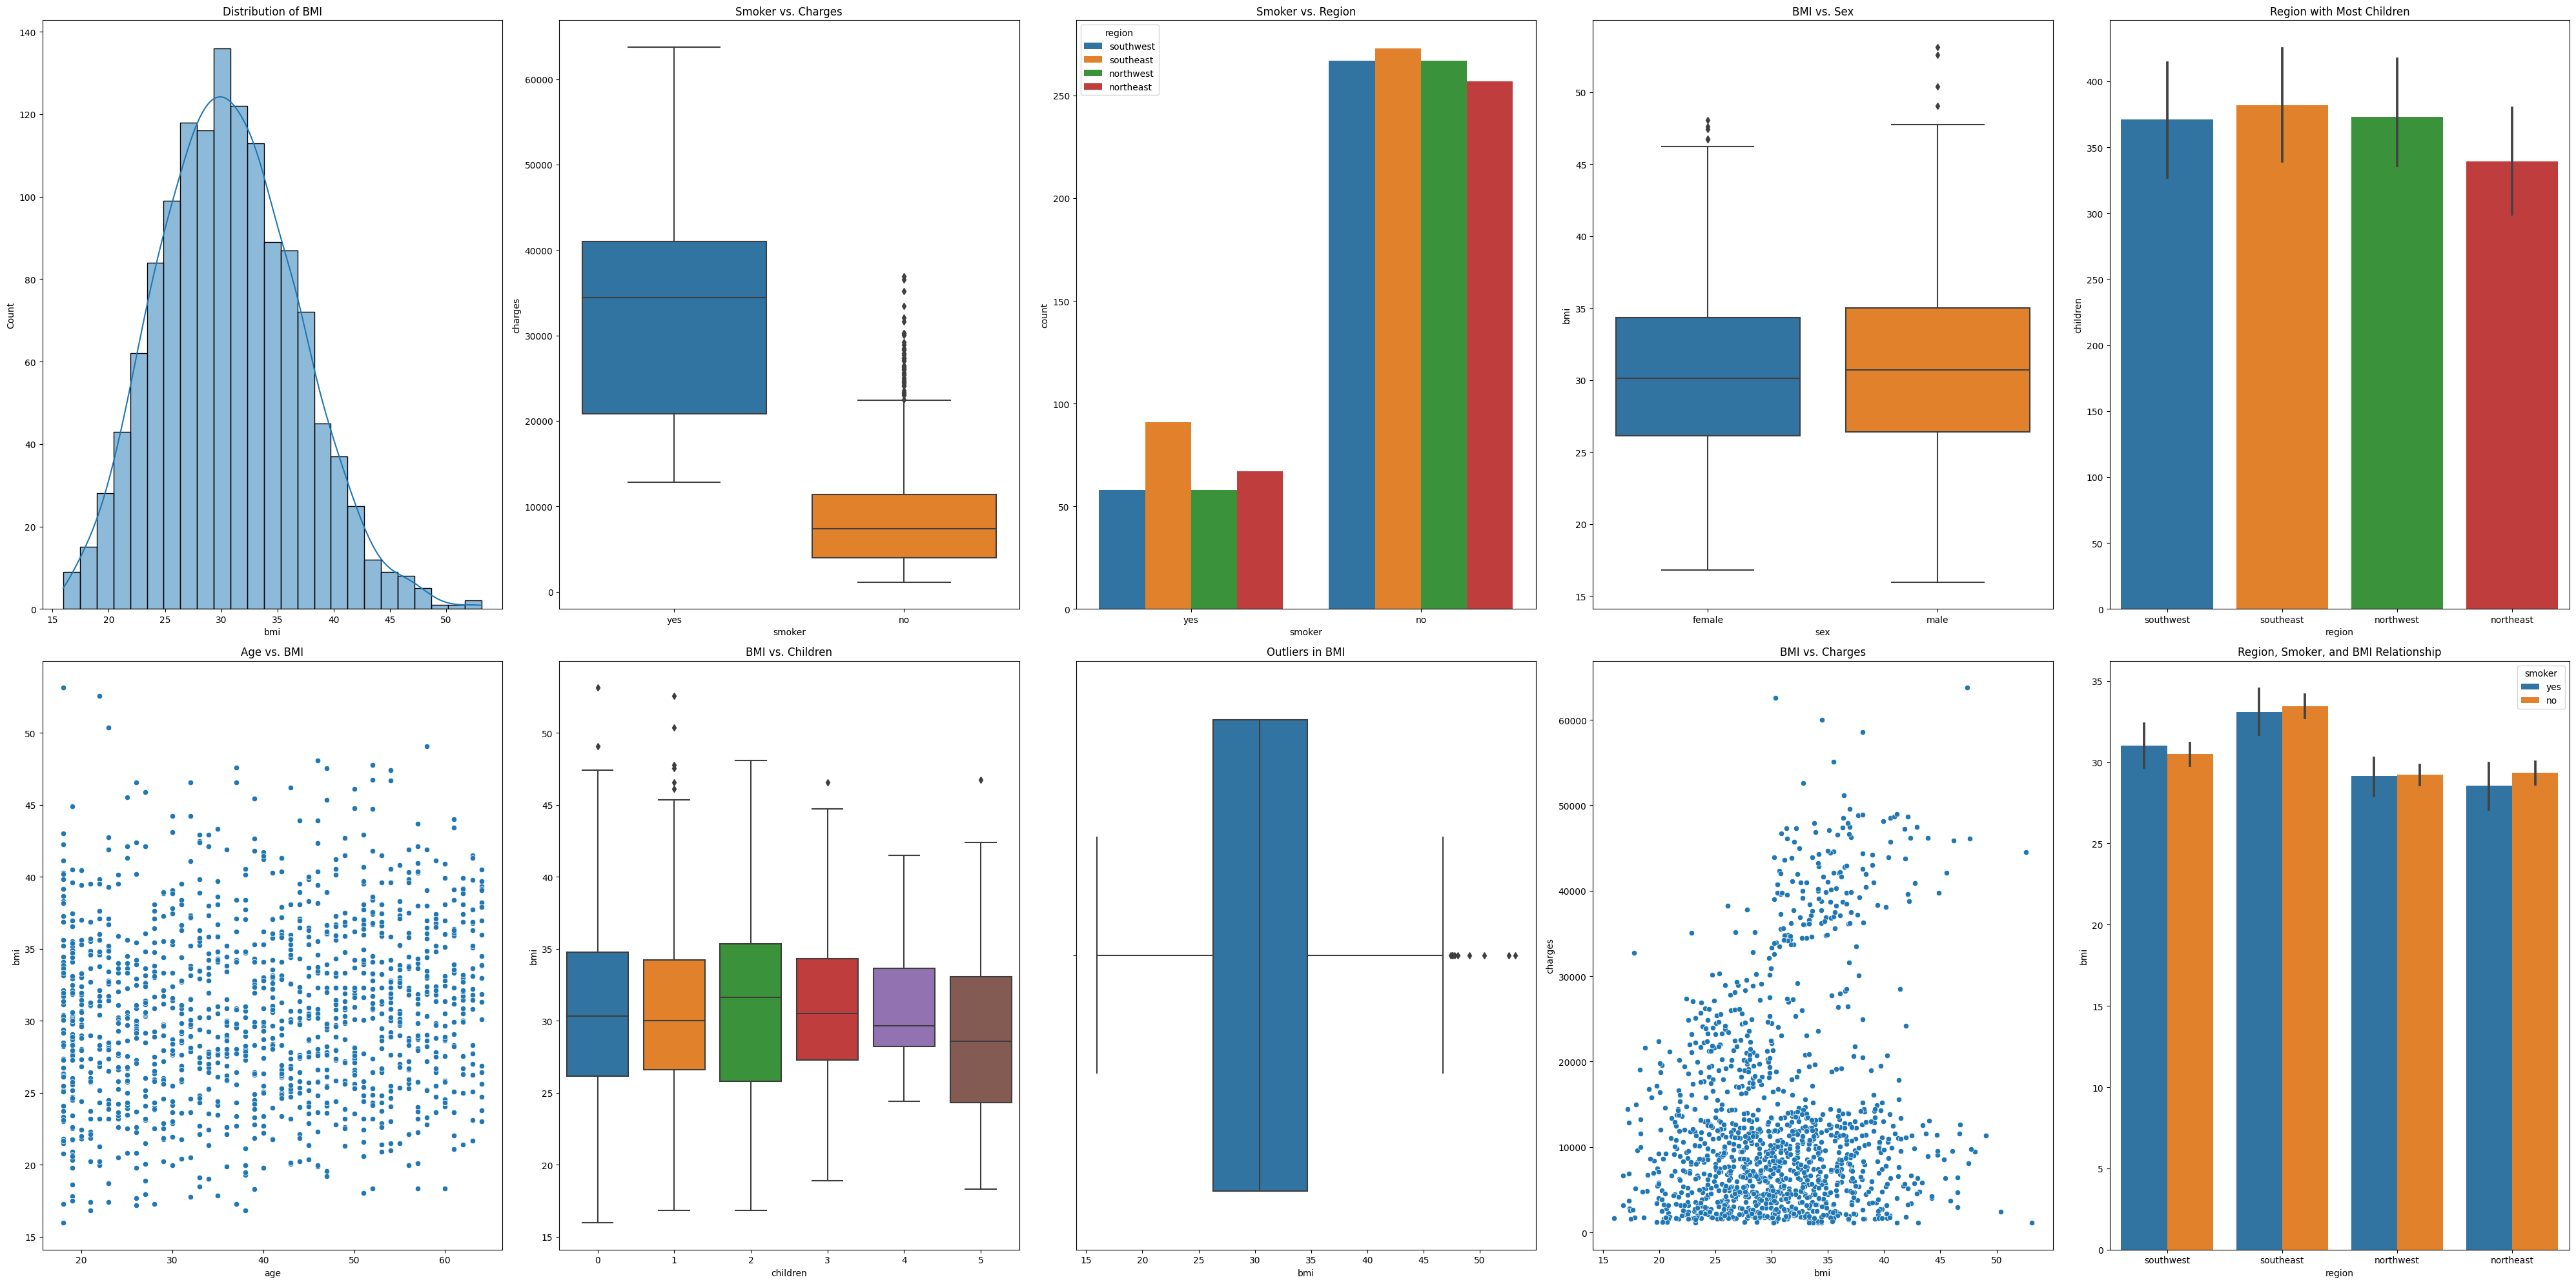

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(40, 20))
fig.subplots_adjust(hspace=0.5)

# Examine the distribution of BMI
sns.histplot(df['bmi'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of BMI')

# Examine the relationship between "smoker" and "charges"
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Smoker vs. Charges')

# Examine the relationship between "smoker" and "region"
sns.countplot(x='smoker', hue='region', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Smoker vs. Region')

# Examine the relationship between "bmi" and "sex"
sns.boxplot(x='sex', y='bmi', data=df, ax=axes[0, 3])
axes[0,3].set_title('BMI vs. Sex')

# Find the "region" with the most "children"
sns.barplot(x='region', y='children', data=df, estimator=sum, ax=axes[0,4])
axes[0,4].set_title('Region with Most Children')

# Examine the relationship between "age" and "bmi"
sns.scatterplot(x='age', y='bmi', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Age vs. BMI')

# Examine the relationship between "bmi" and "children"
sns.boxplot(x='children', y='bmi', data=df, ax=axes[1,1])
axes[1,1].set_title('BMI vs. Children')

# Examine for outliers in the "bmi" variable
sns.boxplot(x=df['bmi'], ax=axes[1,2])
axes[1,2].set_title('Outliers in BMI')

# Examine the relationship between "bmi" and "charges"
sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[1,3])
axes[1,3].set_title('BMI vs. Charges')

# Examine the relationship between "region", "smoker", and "bmi"
sns.barplot(x='region', y='bmi', hue='smoker', data=df, ax=axes[1,4])
axes[1,4].set_title('Region, Smoker, and BMI Relationship')

# Adjust the layout
plt.tight_layout()

# Show all plots
plt.show()


In [ ]:
#Sigara içen veya içmeyen kişilerin Sağlık sigortası tarafından faturalanan bireysel tıbbi masraflarının ortalaması
num_target_analyse(df, 'charges', 'smoker')
#Bu bilgiler gösteriyor ki sigara içen kişilerin masrafları içmeyenlere göre daha yüksek kalıyor

             charges
smoker              
no       8434.268298
yes     32050.231832


In [ ]:
cat_target_analyse(df, 'region', 'smoker')
# Buna göre genel olarak bölgelerde sigara içmeyen kişi sayısının içen kişi sayısına göre daha az olduğunu söyleyebiliriz.

                  region
smoker region           
no     southeast     273
       northwest     267
       southwest     267
       northeast     257
yes    southeast      91
       northeast      67
       northwest      58
       southwest      58


In [ ]:
num_target_analyse(df, 'bmi', 'sex') # bmi değerinin cinsiyete göre çok büyük bir değişim göstermediğini söyleyebiliriz.

              bmi
sex              
female  30.377749
male    30.943129


In [ ]:
#En fazla çocuk olan bölgeyi bul
df.groupby('region')['children'].sum().sort_values(ascending=False)
#southeast 382 en fazla çocuk

region
southeast    382
northwest    373
southwest    371
northeast    339
Name: children, dtype: int64

In [ ]:
num_target_analyse(df, 'bmi', 'age')
#Yaşlara göre bmi oranlarında büyük bir değişim yok

           bmi
age           
18   31.326159
19   28.596912
20   30.632759
21   28.185714
22   31.087679
23   31.454464
24   29.142679
25   29.693929
26   29.428929
27   29.333571
28   29.482143
29   29.383148
30   30.557593
31   29.918333
32   31.597692
33   31.163077
34   30.274038
35   31.394800
36   29.374200
37   31.216600
38   28.996600
39   29.910200
40   30.139074
41   31.506852
42   30.328148
43   30.204444
44   30.844259
45   29.778966
46   31.340862
47   30.664310
48   31.925690
49   30.313929
50   31.132241
51   31.727069
52   32.936034
53   30.360893
54   31.234286
55   31.950000
56   31.600962
57   30.844423
58   32.718200
59   30.572000
60   30.332826
61   32.548261
62   32.342609
63   31.923478
64   32.976136


In [ ]:
# Çocuk sayısı ve bmi değeri arasında bir ilişki yoktur.
num_target_analyse(df, 'bmi', 'children')

                bmi
children           
0         30.550296
1         30.623148
2         30.978104
3         30.684331
4         31.391200
5         29.605000


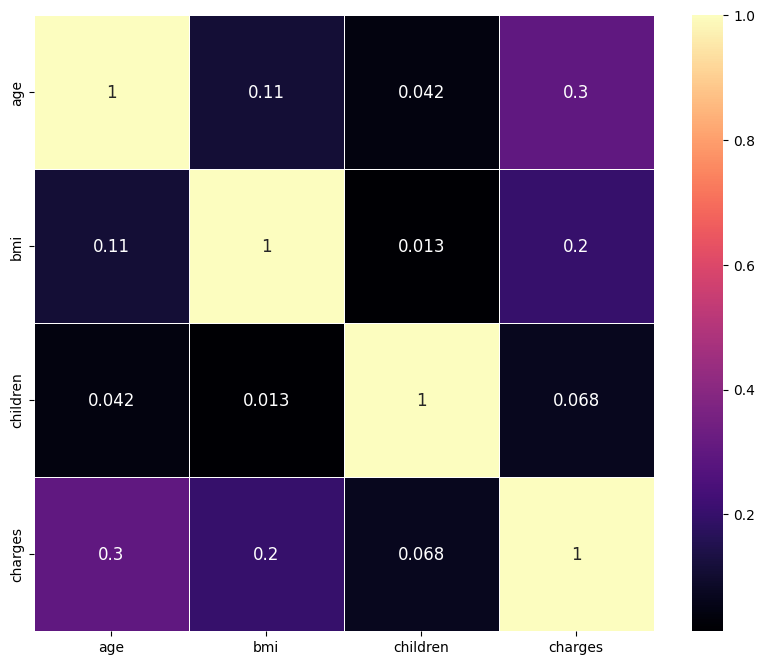

In [ ]:
# Değişkenler arasında ciddi bir doğrusallık yok.
def correlation_matrix(df):
    fig = plt.figure()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df.corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='magma')
    plt.show(block=True)
correlation_matrix(df)

In [ ]:

def grab_col_names(dataframe, cat_th=5, car_th=20):
    cat_col= [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != 'O' and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == 'O' and dataframe[col].nunique() > car_th]
    cat_col= cat_col + num_but_cat
    cat_col = [col for col in cat_col if col not in cat_but_car]

    #Num cols
    num_col= [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_col = [col for col in num_col if col not in num_but_cat]
    return cat_col, num_col

cat_cols, num_cols= grab_col_names(df)
print(f'Cat cols: {cat_cols}')
print(f'Numerical columns: {num_cols}')



Cat cols: ['sex', 'smoker', 'region']
Numerical columns: ['age', 'bmi', 'children', 'charges']


In [ ]:
# Na olan değişken yok
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Outlier değerlerinin alt ve üst limitlerini bul

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quantile1= dataframe[col_name].quantile(q1)
    quantile3= dataframe[col_name].quantile(q3)
    IQR= quantile3-quantile1
    lower_lim= quantile1-1.5*IQR
    upper_lim= quantile3+1.5*IQR
    return lower_lim,upper_lim

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]

    if outliers.any(axis=None):
        num_outliers = outliers.shape[0]
        print(f'{col_name} has {num_outliers} outliers:')
        print(outliers)
        return True
    else:
        print(f'{col_name} has no outliers.')
        return False

for column in num_cols:
    check_outlier(df, column)




age has no outliers.
bmi has 9 outliers:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270
children has no outliers.
charges has 139 outliers:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  no

In [ ]:
def remove_outlier(dataframe, col_name):
    low, up = outlier_thresholds(dataframe, col_name)
    df_without_outliers= dataframe[~((dataframe[col_name] < low) | (dataframe[col_name] > up))]
    return df_without_outliers
df_no_outliers = df.copy()
for col in num_cols:
  df_no_outliers = remove_outlier(df_no_outliers, col)

# Sonuçları görüntüle
print(df_no_outliers)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1191 rows x 7 columns]


In [ ]:
# Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df_encoded = one_hot_encoder(df_no_outliers, cat_cols, True)
print(df_encoded)



      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400         0           1   
1      18  33.770         1   1725.55230         1           0   
2      28  33.000         3   4449.46200         1           0   
3      33  22.705         0  21984.47061         1           0   
4      32  28.880         0   3866.85520         1           0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830         1           0   
1334   18  31.920         0   2205.98080         0           0   
1335   18  36.850         0   1629.83350         0           0   
1336   21  25.800         0   2007.94500         0           0   
1337   61  29.070         0  29141.36030         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0  

In [ ]:
# standardScaler nesnesi oluşturma
scaler = StandardScaler()

# Robust Scaling işlemi
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Ölçeklendirilmiş veriyi gösterme
print("Scaled Data:")
print(df_encoded)

Scaled Data:
           age       bmi  children   charges  sex_male  smoker_yes  \
0    -1.424190 -0.356784 -0.894220  0.972086         0           1   
1    -1.495361  0.643537 -0.071814 -1.137965         1           0   
2    -0.783654  0.512320  1.572998 -0.758821         1           0   
3    -0.427801 -1.242076 -0.894220  1.681898         1           0   
4    -0.498972 -0.189779 -0.894220 -0.839914         1           0   
...        ...       ...       ...       ...       ...         ...   
1333  0.782101  0.166382  1.572998  0.097356         1           0   
1334 -1.495361  0.328274 -0.894220 -1.071094         0           0   
1335 -1.495361  1.168407 -0.894220 -1.151288         0           0   
1336 -1.281849 -0.714650 -0.894220 -1.098658         0           0   
1337  1.564978 -0.157401 -0.894220  2.678074         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0  

In [ ]:
X=df_encoded.drop('charges', axis=1)
y=df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 8
[LightGBM] [Info] Start training from score 0.026802
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 8
[LightGBM] [Info] Start training from score 0.002670
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 953, number of used features: 8
[LightGBM] [Info] Start traini

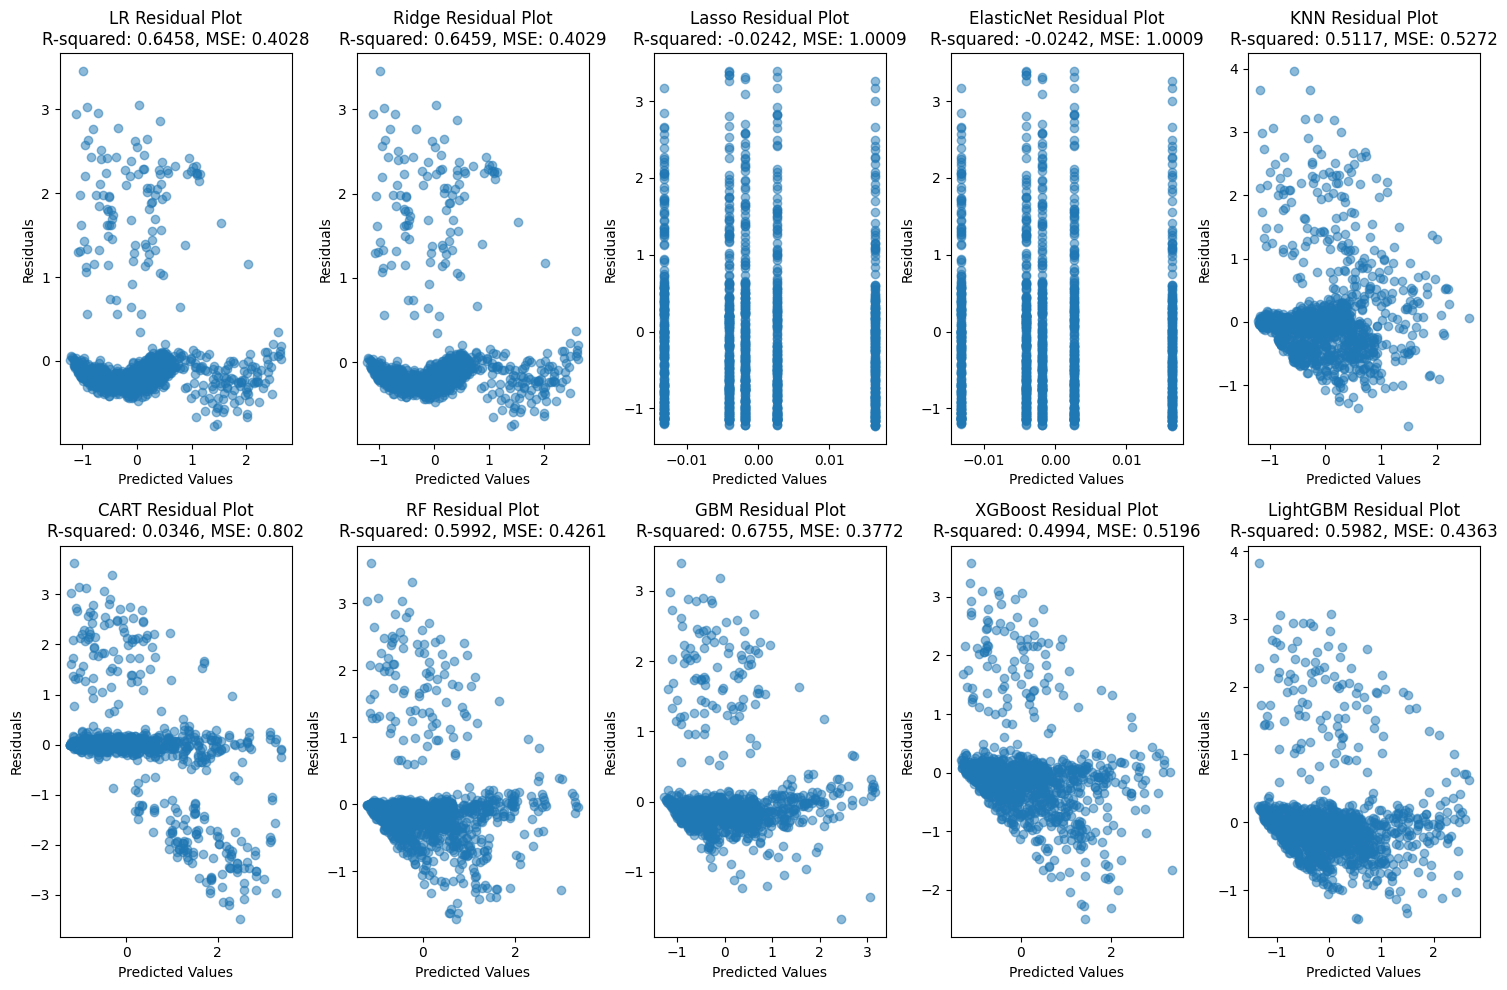

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict

# Model isimleri ve nesneleri
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]


# Subplot düzeni
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

# Modelleri değerlendirme
for i, (name, regressor) in enumerate(models):
    # Modeli eğitim verileriyle eğitme
    regressor.fit(X_train, y_train)

    # R-kare hesaplaması
    r2 = r2_score(y_test, regressor.predict(X_test)) #0-1 arasındadır, 1e yakın olması modelin gözlem verilerini daha iyi açıkladığı anlamına gelir.

    # Hata dağılımı
    y_pred = cross_val_predict(regressor, X, y, cv=5)
    residuals = y - y_pred

    # MSE hesaplaması
    mse = np.mean((residuals ** 2)) #modelin tahminlerinin gerçek değerlere yakınlığını gösterir, ne kadar küçükse o kadar iyidir.


    # Hata dağılımını subplot içine ekleme
    axes[i].scatter(y_pred, residuals, alpha=0.5)
    axes[i].set_title(f'{name} Residual Plot\nR-squared: {round(r2, 4)}, MSE: {round(mse, 4)}')
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Residuals')

# Alt grafik düzenini ayarla ve grafiği göster
plt.tight_layout()
plt.show()





In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize the GBM regressor
gbm = GradientBoostingRegressor(random_state=17)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding MSE score
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best MSE Score:", best_mse)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best MSE Score: 0.39380387152916707


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [100, 200, 300],  # Kullanılacak ağaç sayısını belirler
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Her ağacın sonuçlarına ne kadar ağırlık verileceğini belirler, düşük olması iyidir.
    'max_depth': [3, 4, 5],  # Ağacın derinliğini belirler
    'min_samples_split': [2, 5, 10],  # Ağacın bölünmesi için gereken minimum örnek sayısını belirler
    'min_samples_leaf': [1, 2, 4],  # Bir yaprağın minimum örnek sayısını belirler

}

# Create a Randomized Search CV object
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the Randomized Search model to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Negative MSE Score:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.01}
Best Negative MSE Score: -0.3945501231720887


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

best_params = grid_search.best_params_ #hem randomized search hem de grids search ile yaptığımız hiperparametre optimizasyonu sonrası grid search
#daha verimli olduğu için onun çıktısını kullandık.
optimized_model = GradientBoostingRegressor(**best_params)
optimized_model.fit(X_train, y_train)

y_pred = optimized_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hatası:", mse)
print("Ortalama Mutlak Hata:", mae)
print("R-kare:", r2)




Ortalama Kare Hatası: 0.23631847373115464
Ortalama Mutlak Hata: 0.2817011648797272
R-kare: 0.6799858721764057


In [ ]:
import pickle
def save_model_to_pickle(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Replace 'best_model.pkl' with the desired filename for your saved model
save_model_to_pickle(optimized_model, 'optimized_model.pkl')
